Ejecución de TensorFlow en R
===

Esta lección presenta como ejecutar TensorFlow y TensorBoard desde R, conocimientos a partir de los cuales se construirán algunos modelos a lo largo del curso. La información oficial se encuentra disponible en https://tensorflow.rstudio.com/tensorflow/articles/basic_usage.html

## Objetivos de aprendizaje

- Programar gráficas de flujos de datos en R.
- Abrir y cerrar sesiones en TensorFlow desde R.
- Ejecutar gráficas de flujos de datos de TensorFlow desde R.

## Gráficas computacionales en TensorFlow

### Expresiones simples

El siguiente código muestra como construir la gráfica computacional de $5 * 3 - (3 + 2)$ en TensorFlow.

In [1]:
## 
## Se importa la librería
##
library(tensorflow)

In [2]:
## 
## Construcción de los nodos
##
node1 <- tf$constant(5.0)           # Tensor []
node2 <- tf$constant(2.0)           # Tensor []
node3 <- tf$constant(3.0)           # Tensor []
node4 <- tf$multiply(node1, node2)  # Operación
node5 <- tf$add(node3, node2)       # Operación
node6 <- tf$subtract(node4, node5)  # Operación 

Las variables contienen objetos en memoria.

In [3]:
print(node6)

Tensor("Sub:0", shape=(), dtype=float32)


## Creación y manipulación de gráficas computacionales

Es posible definir y manipular gráficas computacionales.

In [22]:
g1 <- tf$Graph()
g2 <- tf$Graph()

with(g1$as_default(), {
    a <- tf$constant(1)
    b <- tf$constant(2)
    c <- tf$add(a, b)
})
    
with(g2$as_default(),{
    e <- tf$constant(3)
    f <- tf$constant(4)
    g <- tf$multiply(e, f)
})

## Apertura y cerrado de sesiones

Analogamente a Python, en R también se hace necesaria la creación de una sesión para interactuar con la API.

In [5]:
##
##  Abre la sesión y luego la cierra
##
with(tf$Session() %as% sess, {
    outs <- sess$run(node6)          ## realiza la evaluación
    cat(sprintf("outs = %f",outs))   ## imprime el resultado de la evaluación
})

outs = 5.000000

In [13]:
##
##  Para computar el resultado en un nodo se puede usar eval()
##  Note que es necesario pasar la sesión abierta a eval() 
##  para realizar la evaluación.
##
with(tf$Session() %as% sess,{
    cat(sprintf("node6 = %f ",node6$eval()))
    cat(sprintf("node4 = %f ",node4$eval()))
})

node6 = 5.000000 node4 = 10.000000 

In [16]:
##
## run() admite una lista de nodos a evaluar
##
with(tf$Session() %as% sess,{
    outs <- sess$run(c(node6,node4,node5))
    cat(sprintf("outs = %f",outs))
})

outs = 5.000000 outs = 10.000000 outs = 5.000000

In [17]:
##
## La sesión puede ser almacenada en una variable
## y usada en cálculos posteriores
##
sess <- tf$Session()             ## Abre la sesion
outs <- sess$run(node6)          ## Evalua el grafo y almacena el resultado
sess$close()                     ## Cierra la sesión
cat(sprintf("outs = %f",outs))   ## imprime el resultado de la evaluación

outs = 5.000000

**Actividad.--** Realice el cómputo de la siguiente expresión usando TensorFlow en R

$$-0.9 * 2^3 + 2.5 * 2^2 - 3.8 * 2 -4.3$$

## Operaciones con escalares

Las operaciones aritméticas en R con TensorFlow siguen siendo homologas a las presentadas en el modulo anterior.

    Operacion               equivalente
    --------------------------------------
    tf$add(a, b)            a + b
tf$multiply(a, b)       a * b
    tf$subtract(a, b)       a - b
tf$divide(a, b)         a / b
    tf$pow(a, b)            a ** b
tf$mod(a, b)            a % b
    
    tf$abs(a)               abs(a)
tf$square(a)            a ** 2
    tf$sqrt(a)              sqrt(a)
tf$exp(a)               exp(a)
    tf$negative(a)          -a
tf$sigmoid(a)           1 / (1 + exp(-a))
    tf$sign                 sign(a)
tf$maximum
    tf$minimum
tf$logical_and(a, b)    a & b
    tf$logical_or(a, b)     a | b   
tf$greater(a, b)        a > b
    tf$greater_equal(a, b)  a >= b
tf$less_equal(a, b)     a <= b
    tf$less(a, b)           a < b
tf$logical_not(a)       ~a 
    tf$equal(a, b)          a == b
tf$not_equal            a != b

---
**Actividad.--** Compute las siguientes expresiones usando TensorFlow y use TensorBoard para visualizar las gráficas computacionales.

* $\frac{5*(4^2) + \exp{(2)}}{9^2}$

---

## Operaciones matriciales

TensorFlow en R también soporta una gran cantidad de operaciones matriciales. A continuación se presentan ejemplos básicos disponibles:

In [37]:
## Convierte una matriz de R a un tensor
with(tf$Session() %as% sess,{
    a <- matrix(1,3,3)
    b <- tf$convert_to_tensor(a)$eval()
})
print(b)

     [,1] [,2] [,3]
[1,]    1    1    1
[2,]    1    1    1
[3,]    1    1    1


In [38]:
## crea un tensor de 2x2 con ceros
with(tf$Session() %as% sess, {
    print(tf$zeros(c(2,2))$eval())
})

     [,1] [,2]
[1,]    0    0
[2,]    0    0


In [39]:
## crea un tensor de 2x2 con unos
with(tf$Session() %as% sess, {
    print(tf$ones(c(2,2))$eval())
})

     [,1] [,2]
[1,]    1    1
[2,]    1    1


In [91]:
## crea un tensor de 3x2 con aleatorios 
## Por defecto genera valores de la normal estandar
with(tf$Session() %as% sess, {
    t -> tf$random_normal(list(3L,2L))
    print(t$eval())
})

           [,1]       [,2]
[1,] -2.0449452 -0.1258496
[2,] -0.0626974 -1.0317870
[3,]  0.4562011  0.8926023


In [92]:
## crea un tensor de 3x2 con aleatorios 
## normales truncado
with(tf$Session() %as% sess, {
    t -> tf$truncated_normal(list(3L,2L))
    print(t$eval())
})

           [,1]      [,2]
[1,]  0.3284631 -1.653644
[2,] -1.6417620 -1.094942
[3,] -0.3659464  1.332795


In [93]:
## crea un tensor de aleatorios uniformes de 3x2
with(tf$Session() %as% sess, {
    t -> tf$random_uniform(list(3L,2L))
    print(t$eval())
})

            [,1]      [,2]
[1,] 0.460012436 0.4434766
[2,] 0.073261619 0.8804345
[3,] 0.002163768 0.3541161


In [94]:
## crea un tensor de 3x2 lleno de 4s.
with(tf$Session() %as% sess, {
    t -> tf$fill(list(3L,2L),4)
    print(t$eval())
})

     [,1] [,2]
[1,]    4    4
[2,]    4    4
[3,]    4    4


In [128]:
## crea un tensor constante a partir de 
## una lista de listas que representan una
## matriz
with(tf$Session() %as% sess, {
    t -> tf$constant(cbind(c(1,2,3),c(4,5,6)))
    print(t$eval())
})

     [,1] [,2]
[1,]    1    4
[2,]    2    5
[3,]    3    6


In [129]:
## genera un tensor mezclando los elementos
## de un tensor constante
with(tf$Session() %as% sess, {
    t -> tf$random_shuffle(c(1,2,3,4,5,6))
    print(t$eval())
})

[1] 6 3 2 5 1 4


Se utilizan funciones análogas para reducir los tensores:

    tf$reduce_sum
tf$reduce_prod
    tf$reduce_min
tf$reduce_max
    tf$reduce_mean
tf$reduce_all
    tf$reduce_any
tf$reduce_logsumexp
    tf$count_nonzero
tf$accumulate_n
    tf$einsum
    

In [145]:
## obtiene las dimensiones de un tensor
with(tf$Session() %as% sess, {
    m <- tf$constant(cbind(c(1,2,3),c(4,5,6)))
    print(m$eval())
    print(m$get_shape())
})

     [,1] [,2]
[1,]    1    4
[2,]    2    5
[3,]    3    6
(3, 2)


In [146]:
## suma de las columnas de un tensor
with(tf$Session() %as% sess, {
    print(tf$reduce_sum(m,reduction_indices=list(0L))$eval())
})

[1]  6 15


In [147]:
## suma de las filas de un tensor
with(tf$Session() %as% sess, {
    print(tf$reduce_sum(m,reduction_indices=list(1L))$eval())
})

[1] 5 7 9


In [148]:
## suma de todos los elementos de un tensor
## suma de las filas de un tensor
with(tf$Session() %as% sess, {
    print(tf$reduce_sum(m)$eval())
})

[1] 21


In [150]:
## suma dos tensores
with(tf$Session() %as% sess, {
    a = m + m 
    print(a$eval())
})

     [,1] [,2]
[1,]    2    8
[2,]    4   10
[3,]    6   12


In [155]:
## cambia las dimensiones de un tensor
with(tf$Session() %as% sess, {
    print(tf$reshape(m,list(1L,6L))$eval())
})

     [,1] [,2] [,3] [,4] [,5] [,6]
[1,]    1    4    2    5    3    6


In [156]:
## cambia las dimensiones de un tensor
with(tf$Session() %as% sess, {
    print(tf$reshape(m,list(3L,2L))$eval())
})

     [,1] [,2]
[1,]    1    4
[2,]    2    5
[3,]    3    6


In [2]:
## suma varios tensores elemento a elemento
with(tf$Session() %as% sess, {
    a <- tf$constant(cbind(c(1,2),c(3,4)))
    b <- tf$constant(cbind(c(5,0),c(0,6)))
    print(tf$accumulate_n(c(a,b,a))$eval())
})

     [,1] [,2]
[1,]    7    6
[2,]    4   14


In [10]:
## suma varios tensores elemento a elemento
with(tf$Session() %as% sess, {
    print(tf$add_n(c(a,b,a))$eval())
})

     [,1] [,2]
[1,]    7    6
[2,]    4   14


In [16]:
## Busca el valor máximo en el tensor y devuelve la posición contando desde cero
with(tf$Session() %as% sess, {
    t <- tf$constant(c(1,3,2,5,0))
    print(tf$argmax(t)$eval())
})

[1] 3


In [17]:
## Busca el valor mínimo en el tensor y devuelve la posición contando desde cero
with(tf$Session() %as% sess, {
    t <- tf$constant(c(1,3,2,5,0))
    print(tf$argmin(t)$eval())
})

[1] 4


**Actividad.--** Para las matrices

$$\mathbf{X} =
\left[
  \begin{array}{cc}
     0.0 & 2.1 \\
     1.9 & 6.2 \\
     3.0 & 1.9 \\
     1.2 & 3.2 
  \end{array}
\right],
\qquad \mathbf{y} = 
\left[
  \begin{array}{c}
     3.1 \\
     4.0 \\
     5.1 \\
     6.1  
  \end{array}
\right]
$$

compute

* $\mathbf{z} = (\mathbf{X}' \mathbf{X})^{-1} \mathbf{X}' \mathbf{y}$


* $\mathbf{p} = \mathbf{X} \mathbf{z}$

**Actividad.--** Indique para que sirven las siguientes funciones del modulo `tf` y realice un ejemplo:

    tf$clip_by_value
tf$clip_by_norm
    tf$clip_by_average_norm
tf$clip_by_global_norm
    tf$clip_by_norm
tf$concat
    tf$case
tf$cond
    tf$cumprod
tf$cumsum
    tf$diag
tf$inverse_permutation
    tf$log_sigmoid 
tf$map_fn
    
    tf$matrix_inverse
tf$matrix_diag
    tf$matrix_set_diag
tf$matrix_solve
    tf$matrix_transpose
tf$parallel_stack
    tf$stack
tf$random_shuffle
    tf$reverse
tf$maximum
    tf$minimum
    

## Variables y Placeholders

Las variables en TensorFlow pueden entenderse como las variables locales de una función, las cuales no pueden ser accesadas desde el exterior. Los placeholders son equivalentes a los parámetros, los cuales pueden tomar cualquier valor cuando se llama la función.

In [70]:
## define a, b y c como placeholders
a <- tf$placeholder(tf$float32)
b <- tf$placeholder(tf$float32)
c <- tf$placeholder(tf$float32)

## define los nodos de cómputo
node4 <- tf$multiply(a, b)
node5 <- tf$add(c, b)
node6 <- tf$subtract(node4, node5)

with(tf$Session() %as% sess,{
    print(sess$run(node6, feed_dict=dict(a = 5, b = 3,c=2)))
    print(sess$run(node6, feed_dict=dict(a = 4, b = 2,c=3)))
    print(sess$run(node6, feed_dict=dict(a = 4, b = 3,c=1)))
})

[1] 10
[1] 3
[1] 8


In [85]:
##
## la misma operación pero matricial
##
a <- tf$placeholder(tf$float32,shape=c(3L,3L))
b <- tf$placeholder(tf$float32,shape=c(3L,3L))
c <- tf$placeholder(tf$float32,shape=c(3L,3L))

node4 = tf$multiply(a, b)
node5 = tf$add(c, b)
node6 = tf$subtract(node4, node5)

with(tf$Session() %as% sess,{
    print(sess$run(node6, feed_dict=dict(
        a = cbind(c(1,0,0),c(0,1,0),c(0,0,1)),
        b = matrix(rnorm(9),3,3),
        c = matrix(rnorm(9),3,3))))
})

           [,1]      [,2]      [,3]
[1,]  0.5919801 -1.009552 0.1683660
[2,] -0.3372244  1.635849 1.3323969
[3,] -2.1025639  2.502614 0.6471938


El siguiente ejemplo presente un acumulador para el calculo de $n = n + 1$.

    [=] (node1)  
     +---[n]
     +---[+] (node0)
          +----[n]
          +----[1]
     

In [88]:
## crea la variable y la inicializa a cero
n <- tf$Variable(0)

## arbol sintactico que representa las operaciones
node0 <- tf$add(n, tf$constant(1))
node1 <- tf$assign(n, node0)

## Evalua
with(tf$Session() %as% sess, {
    
    sess$run(tf$global_variables_initializer())
    
    for (i in seq(1,5,1)){
        print(sess$run(node1))
    }
})

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


In [89]:
## crea la variable y la inicializa a cero
n <- tf$Variable(0)

node0 <- tf$assign_add(n,tf$constant(1))

## arbol sintactico que representa las operaciones
## se usa tf$assign_add para simplificar el arbol
## tambien existe tf$assign_sub
with(tf$Session() %as% sess, {
    sess$run(tf$global_variables_initializer())
    for (i in seq(1,5,1)){
        print(sess$run(node0))
    }
})

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


**Actividad.--** Evalue la función

$$f(x) = 0.3x^3 - 0.6x^2 - 0.1x + 0.5$$

para el vector


$$\mathbf{x} = 
\left[
  \begin{array}{c}
     1.0 \\
     4.2 \\
     3.1 \\
     6.3  
  \end{array}
\right]
$$




**Actividad.--** Genere los 10 primeros términos de la serie de Fibonacci usando TensorFlow.

    1, 1, 2, 3, 5, 8, 13, ...

## Uso de TensorFlow con otras librerías de R

Los resultados de cómputos realizados con TensorFlow pueden ser asignados a variables en R para ser usados directamente con otras librerías. En el siguiente ejemplo, se generan 20 puntos  aleatorios normales estándar y luego se grafican con la función `plot` nativa de R:

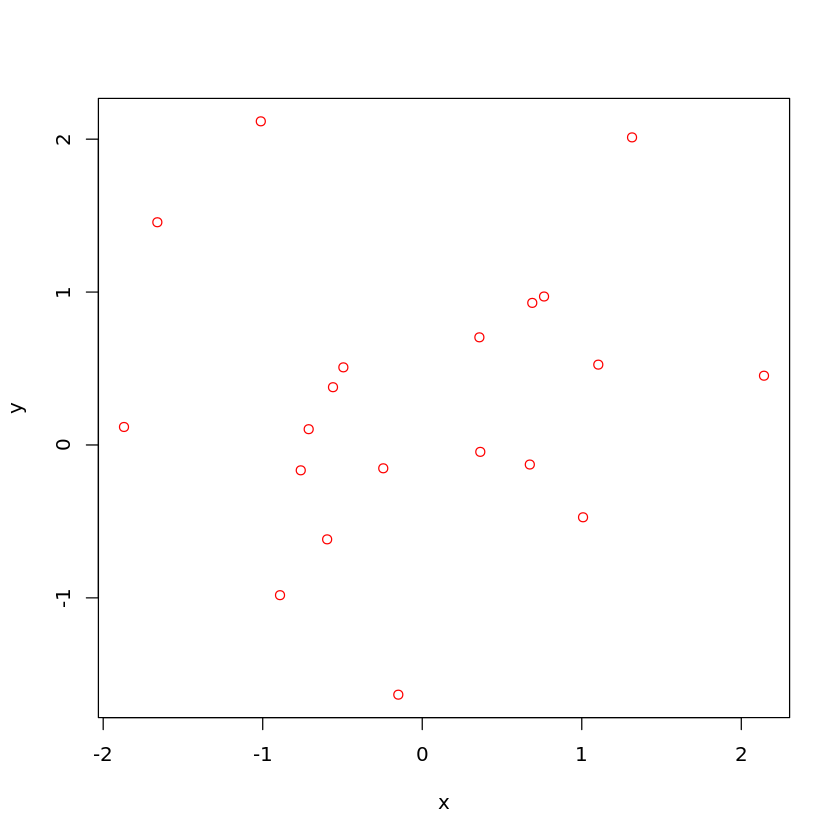

In [101]:
## Se generan los datos
a <- tf$random_normal(list(2L,20L))

with(tf$Session() %as% sess,{
    result <- sess$run(a)
})

## Se asignan los valores a las variables x y y
x <- result[1,]
y <- result[2,]
plot(x,y, col= "red")